# 01 - Data Cleaning & Initial Exploration

In this notebook, we:
- Load NHS A&E time series data from 2010–2025
- Clean column names for analysis
- Parse the `Period` column into datetime
- Remove empty rows and columns
- Visualize overall A&E attendance trends


In [2]:
import sys
import os

# Add src folder to the path
src_path = os.path.abspath('./src')
sys.path.append(src_path)

print("src path:", src_path)
print("Exists:", os.path.exists(src_path))
print("Files in src:", os.listdir(src_path))


src path: C:\Users\hello\nhs-wait-times\src
Exists: True
Files in src: ['.ipynb_checkpoints', 'load_clean.py', 'Untitled.ipynb', '__pycache__']


In [11]:
from load_clean import load_and_clean

df = load_and_clean('./data/raw/Monthly-AE-Time-Series-June-2025-1-1.xls')
df.head()


ORIGINAL COLUMNS: ['Period', 'Type 1 Departments - Major A&E', 'Type 2 Departments - Single Specialty', 'Type 3 Departments - Other A&E/Minor Injury Unit', 'Total Attendances', 'Emergency Admissions via Type 1 A&E', 'Emergency Admissions via Type 2 A&E', 'Emergency Admissions via Type 3 and 4 A&E', 'Total Emergency Admissions via A&E', 'Other Emergency Admissions (i.e not via A&E)', 'Total Emergency Admissions', 'Number of patients spending >4 hours from decision to admit to admission', 'Number of patients spending >12 hours from decision to admit to admission', 'Operational standard (Performance)']
CLEANED COLUMNS: ['period', 'type_1_departments_-_major_a&e', 'type_2_departments_-_single_specialty', 'type_3_departments_-_other_a&e/minor_injury_unit', 'total_attendances', 'emergency_admissions_via_type_1_a&e', 'emergency_admissions_via_type_2_a&e', 'emergency_admissions_via_type_3_and_4_a&e', 'total_emergency_admissions_via_a&e', 'other_emergency_admissions_(i.e_not_via_a&e)', 'total_e

,period,type_1_departments_-_major_a&e,type_2_departments_-_single_specialty,type_3_departments_-_other_a&e/minor_injury_unit,total_attendances,emergency_admissions_via_type_1_a&e,emergency_admissions_via_type_2_a&e,emergency_admissions_via_type_3_and_4_a&e,total_emergency_admissions_via_a&e,other_emergency_admissions_(i.e_not_via_a&e),total_emergency_admissions,number_of_patients_spending_>4_hours_from_decision_to_admit_to_admission,number_of_patients_spending_>12_hours_from_decision_to_admit_to_admission,operational_standard_(performance)
0,2010-08-01,1.138652e+06,54371.000000,559358.000000,1.752381e+06,287438.000000,5367.000000,8081.000000,300886.000000,124816.000000,425702.000000,3697.000000,1.0,0.95
1,2010-09-01,1.150728e+06,55181.000000,550359.000000,1.756268e+06,293991.000000,5543.000000,3673.000000,303207.000000,121693.000000,424900.000000,5907.000000,0.0,0.95
2,2010-10-01,1.163143e+06,54961.000000,583244.000000,1.801348e+06,303452.000000,5485.000000,2560.000000,311497.000000,124718.000000,436215.000000,6932.000000,0.0,0.95
3,2010-11-01,1.111295e+06,53727.428571,486005.428571,1.651027e+06,297832.000000,5731.142857,3279.000000,306842.142857,122256.857143,429099.000000,7179.000000,2.0,0.95
4,2010-12-01,1.159204e+06,45536.428571,533000.857143,1.737741e+06,318602.428571,6277.000000,3198.428571,328077.857143,124650.857143,452728.714286,13818.142857,15.0,0.95


In [12]:
   print(df.columns.tolist())

['period', 'type_1_departments_-_major_a&e', 'type_2_departments_-_single_specialty', 'type_3_departments_-_other_a&e/minor_injury_unit', 'total_attendances', 'emergency_admissions_via_type_1_a&e', 'emergency_admissions_via_type_2_a&e', 'emergency_admissions_via_type_3_and_4_a&e', 'total_emergency_admissions_via_a&e', 'other_emergency_admissions_(i.e_not_via_a&e)', 'total_emergency_admissions', 'number_of_patients_spending_>4_hours_from_decision_to_admit_to_admission', 'number_of_patients_spending_>12_hours_from_decision_to_admit_to_admission', 'operational_standard_(performance)']


In [13]:
 print(df.head())

      period  type_1_departments_-_major_a&e  \
0 2010-08-01                    1.138652e+06   
1 2010-09-01                    1.150728e+06   
2 2010-10-01                    1.163143e+06   
3 2010-11-01                    1.111295e+06   
4 2010-12-01                    1.159204e+06   

   type_2_departments_-_single_specialty  \
0                           54371.000000   
1                           55181.000000   
2                           54961.000000   
3                           53727.428571   
4                           45536.428571   

   type_3_departments_-_other_a&e/minor_injury_unit  total_attendances  \
0                                     559358.000000       1.752381e+06   
1                                     550359.000000       1.756268e+06   
2                                     583244.000000       1.801348e+06   
3                                     486005.428571       1.651027e+06   
4                                     533000.857143       1.737741e+06   

 

In [15]:
   # Look for similar column names
   [col for col in df.columns if 'period' in col.lower()]
   

['period']

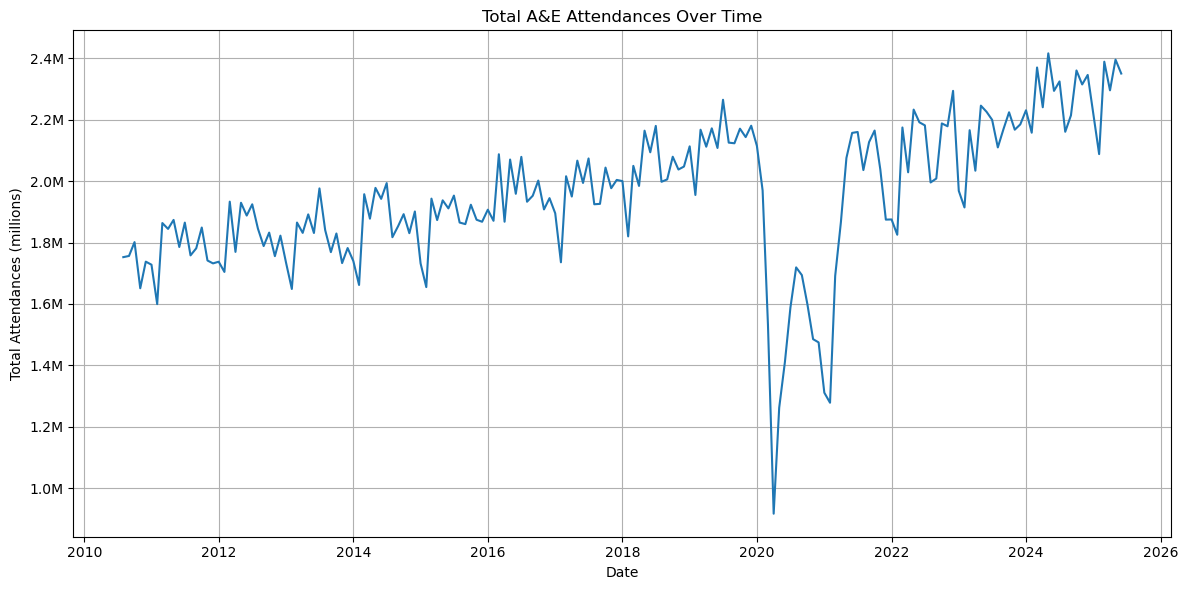

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.figure(figsize=(12, 6))
plt.plot(df['period'], df['total_attendances'])

plt.title('Total A&E Attendances Over Time')
plt.xlabel('Date')
plt.ylabel('Total Attendances (millions)')

# Format y-axis ticks to show millions
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*1e-6:.1f}M'))

plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
df.describe().T


,count,mean,min,25%,50%,75%,max,std
period,179,2017-12-31 04:17:25.810055936,2010-08-01 00:00:00,2014-04-16 00:00:00,2018-01-01 00:00:00,2021-09-16 00:00:00,2025-06-01 00:00:00,NaN
type_1_departments_-_major_a&e,179.0,1260806.340782,689720.0,1197298.285714,1258205.0,1351789.5,1472721.0,119628.018516
type_2_departments_-_single_specialty,179.0,47319.164405,19726.0,43663.0,49233.0,52106.857143,58574.285714,6972.855358
type_3_departments_-_other_a&e/minor_injury_unit,179.0,643867.446927,207129.0,577745.357143,628214.285714,731001.0,892325.0,114837.322332
total_attendances,179.0,1951992.952115,916575.0,1829944.785714,1949762.0,2124390.0,2416292.0,232116.758202
emergency_admissions_via_type_1_a&e,179.0,353843.910615,252680.0,322154.5,356160.0,384714.5,420025.0,37345.932099
emergency_admissions_via_type_2_a&e,179.0,1684.005587,960.0,1225.5,1353.0,1624.214286,6277.0,934.785415
emergency_admissions_via_type_3_and_4_a&e,179.0,4123.217877,2145.142857,3363.714286,4164.0,4839.0,8081.0,1233.098372
total_emergency_admissions_via_a&e,179.0,359651.134078,257928.0,327026.285714,360998.0,390422.0,426154.0,37799.622834
other_emergency_admissions_(i.e_not_via_a&e),179.0,125630.413408,68653.0,120495.428571,125656.0,132333.285714,147086.0,10887.653839


In [18]:
missing = df.isnull().sum()
print("Missing values per column:\n", missing[missing > 0])


Missing values per column:
 operational_standard_(performance)    92
dtype: int64


## Step 1: Load & Inspect Data

We load the Excel file and display the first few rows. This data includes monthly A&E attendance and emergency admissions across England from August 2010 to June 2025.


## Step 2: Clean Column Names

To simplify analysis, we:
- Dropped fully empty rows and columns
- Normalized column names (lowercase, replaced spaces with underscores)
- Parsed dates from the `Period` column


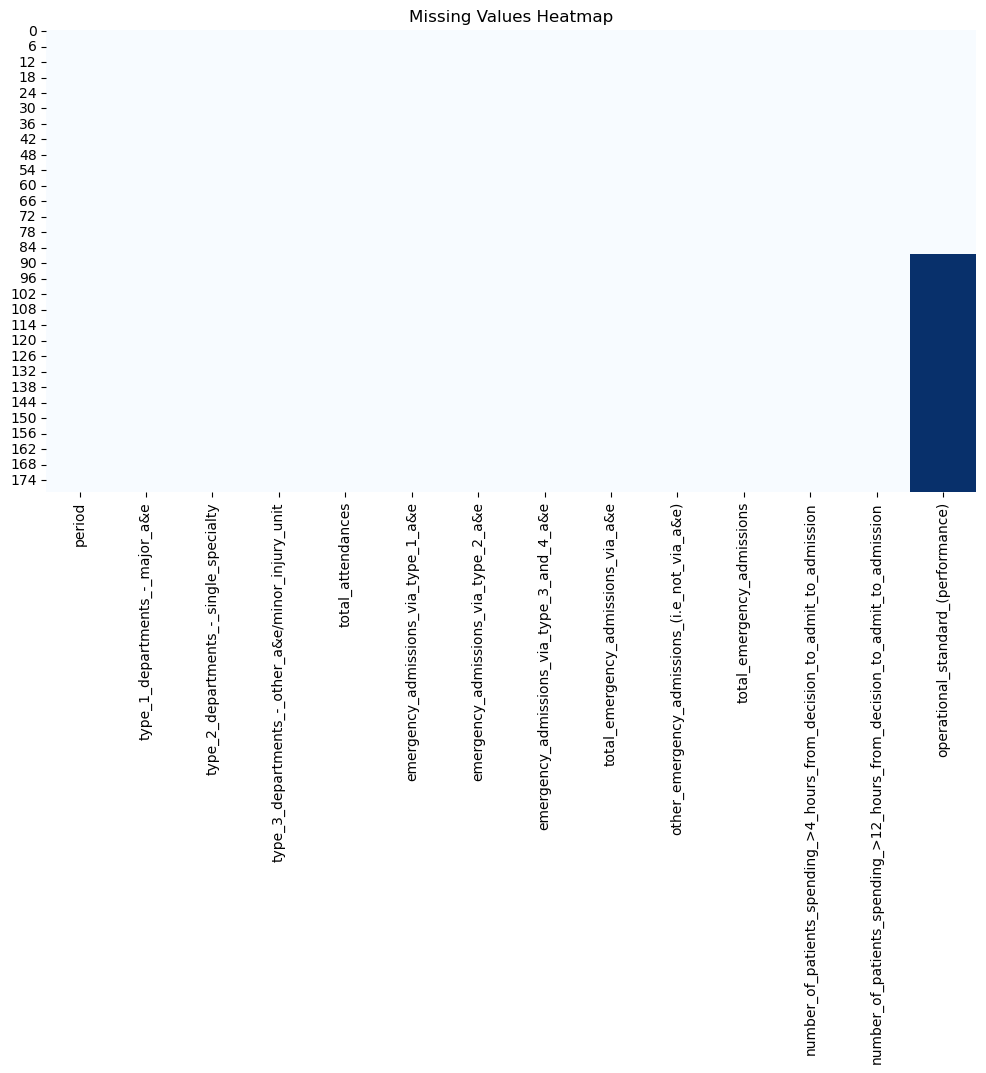

In [20]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="Blues")
plt.title("Missing Values Heatmap")
plt.show()


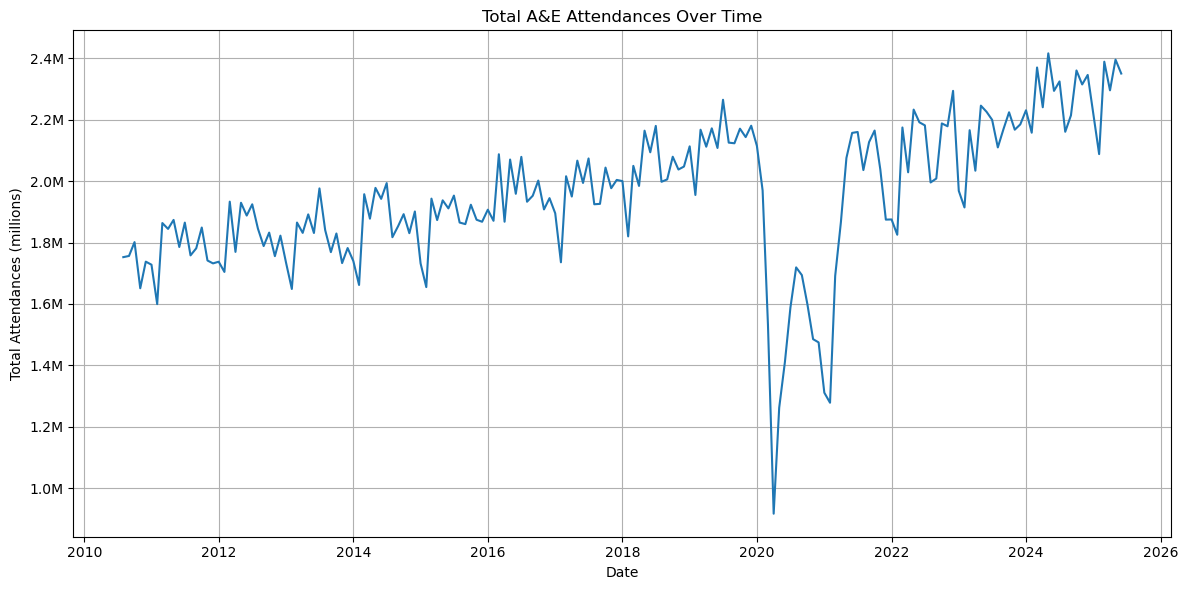

In [21]:
import matplotlib.ticker as mtick

plt.figure(figsize=(12, 6))
plt.plot(df['period'], df['total_attendances'])

plt.title('Total A&E Attendances Over Time')
plt.xlabel('Date')
plt.ylabel('Total Attendances (millions)')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*1e-6:.1f}M'))

plt.grid(True)
plt.tight_layout()
plt.show()
